# Kapittel 17

Gi talet på delintervall:  100


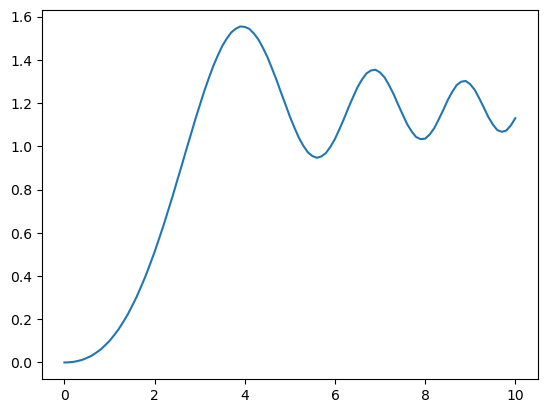

In [1]:
"""Implementeringa løyser startverdiproblemet
a(x) y' + b(x) y = c(x), y(x_0)=y_0.
Koden brukar endeleg differanse-formlar for
numeriske deriverte til å sette opp problemet
som ei matriselikning.
Input:
  1) Funksjonane a(x), b(x) og c(x)
  2) Startkravet, x0 og y0
  3) Maksimalverdi for x, xf
  4) Talet på delintervall, N
Til den siste variabelen brukar vi input-funksjonen.
Dei andre er hardkoda.
"""

# Importerer bibliotek
import numpy as np
import sympy
import matplotlib.pyplot as plt

# Inputvariablar
x0 = 0
y0 = 0
xf = 10
# Gir oppdelinga av x-intervallet
N = int(input('Gi talet på delintervall: '))

# Funksjonar
def a(x):
    return np.log(x+1)
    
def b(x):
    return np.exp(-x)
    
def c(x):
    return np.sin(x**2/5)

# Vektor med x-verdiar
h = (xf-x0)/N
x_vektor = np.linspace(x0+h, xf, N)

# Matriser og vektor for funksjonane
A_mat = np.diag(a(x_vektor))
B_mat = np.diag(b(x_vektor))
# reshape() transponerer vektoren til ein søylevektor
C_vektor = c(x_vektor.reshape(-1,1))

# Matrise for den deriverte
# Brukar midtpunktsformelen for numerisk derivasjon
D1_mat = np.zeros((N, N))
for ind in range(1, N-1):
    D1_mat[np.ix_([ind], [ind-1, ind+1])] = \
        np.array([-1, 1])/(2*h)
# Derivert i venstre ende
D1_mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1_mat[N-1, (N-3):N] = np.array([1, -4, 3])/(2*h)

# Set opp totalmatrisa
tot_mat =  np.hstack(((np.matmul(A_mat, D1_mat)+B_mat), 
                     C_vektor))
# Legg til startkravet
tot_mat[0,N] = tot_mat[0,N] + a(x0+h) * y0/(2*h)

# Løyser likningssystemet
aux_s = sympy.Matrix(tot_mat).rref()[0]
aux = np.array(aux_s)
y_vektor = np.transpose(aux[:, N])
# Tar med utgangspunktet
y_vektor =  np.insert(y_vektor, 0, y0)
x_vektor =  np.insert(x_vektor, 0, x0)

# Plottar løysinga
plt.plot(x_vektor, y_vektor)
plt.show()

Gi talet på delintervall:  100


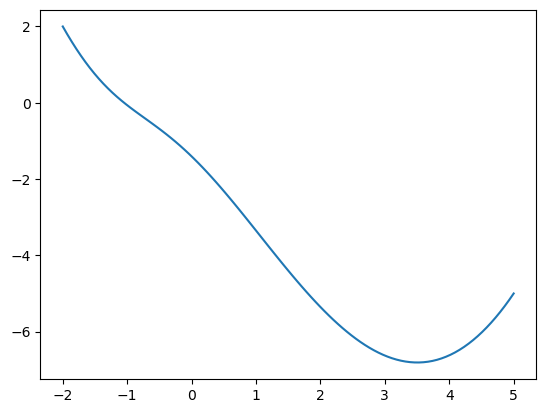

In [6]:
"""Numerisk løysing av randverdiproblemet
a(x) y'' + b(x) y' + c(x) y = d(x) med
y(x_0)=y_0 og y(x_f)=y_f.
Implementeringa brukar endeleg differanse-formlar for
numeriske deriverte til å sette opp problemet
som ei matriselikning.
Input:
  1) Funksjonane a(x), b(x), c(x) og d(x)
  2) Verdiane for x_0 og x_f
  3) Randkrava y(x_0) og y(x_f)
  4) Talet på delintervall, N
Til den siste variabelen brukar vi input-funksjonen.
Dei andre er hardkoda.
"""

# Importerer bibliotek
import numpy as np
import sympy
import matplotlib.pyplot as plt

# Inputvariablar
x0 = -2
y0 = 2
xf = 5
yf = -5
# Gir oppdelinga av x-intervallet
N = int(input('Gi talet på delintervall: '))

# Funksjonar
def a(x):
    return np.exp(x)
    
def b(x):
    return x
    
def c(x):
    return -2*x**0

def d(x):
    return 2*np.exp(x)-x

# Vektor med x-verdiar
h = (xf-x0)/N
x_vektor = np.linspace(x0+h, xf-h, N-1)

# Matriser og vektor for funksjonane
A_mat = np.diag(a(x_vektor))
B_mat = np.diag(b(x_vektor))
C_mat = np.diag(c(x_vektor))
# reshape() transponerer vektoren til ein søylevektor
D_vektor = d(x_vektor.reshape(-1,1))

# Matriser for dei deriverte
D1_mat = np.zeros((N-1, N-1))
D2_mat = np.zeros((N-1, N-1))
for ind in range(1, N-2):
    D1_mat[ind, [ind-1, ind+1]] = np.array([-1, 1])/(2*h)
    D2_mat[ind, [ind-1, ind, ind+1]] = \
            np.array([1, -2, 1])/h**2
    
# Derivert i venstre ende
D1_mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1_mat[N-2, N-3] = -1/(2*h)
# Dobbeltderivert i venstre ende
D2_mat[0, 0:2] = np.array([-2, 1])/h**2
# Dobbeltderivert i høgre ende
D2_mat[N-2, (N-3):(N-1)] = np.array([1, -2])/h**2

# Set opp totalmatrisa
tot_mat = np.hstack((np.matmul(A_mat, D2_mat) + \
            np.matmul(B_mat, D1_mat)+C_mat, D_vektor))

# Legg til randkrava
tot_mat[0, N-1] = tot_mat[0, N-1] + \
    y0*(-a(x0+h)/h**2+b(x0+h)/(2*h))
tot_mat[N-2, N-1] = tot_mat[N-2, N-1] - \
    yf*(a(xf-h)/h**2+b(xf-h)/(2*h))

# Løyser likningssystemet
aux_s = sympy.Matrix(tot_mat).rref()[0]
aux = np.array(aux_s)
y_vektor = np.transpose(aux[:, N-1])
# Tar med randpunkta
y_vektor = np.concatenate([[y0], y_vektor, [yf]])
x_vektor = np.concatenate([[x0], x_vektor, [xf]])

# Plottar løysinga
plt.plot(x_vektor, y_vektor)
plt.show()

Gi talet på delintervall:  100


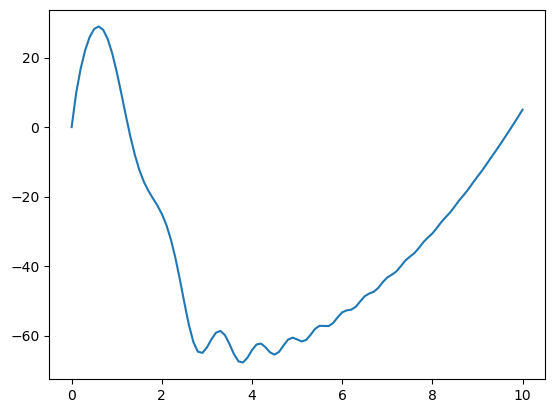

In [8]:
# Importerer bibliotek
import numpy as np
import sympy
import matplotlib.pyplot as plt

# Inputvariablar
x0 = 0
y0 = 0
xf = 10
yf = 5
# Gir oppdelinga av x-intervallet
N = int(input('Gi talet på delintervall: '))

# Funksjonar
def a(x):
    return x
    
def b(x):
    return np.sqrt(x)
    
def c(x):
    return 10*np.sin(x**2)

def d(x):
    return x**2

# Vektor med x-verdiar
h = (xf-x0)/N
x_vektor = np.linspace(x0+h, xf-h, N-1)

# Matriser og vektor for funksjonane
A_mat = np.diag(a(x_vektor))
B_mat = np.diag(b(x_vektor))
C_mat = np.diag(c(x_vektor))
# reshape() transponerer vektoren til ein søylevektor
D_vektor = d(x_vektor.reshape(-1,1))

# Matriser for dei deriverte
D1_mat = np.zeros((N-1, N-1))
D2_mat = np.zeros((N-1, N-1))
for ind in range(1, N-2):
    D1_mat[ind, [ind-1, ind+1]] = np.array([-1, 1])/(2*h)
    D2_mat[ind, [ind-1, ind, ind+1]] = \
            np.array([1, -2, 1])/h**2
    
# Derivert i venstre ende
D1_mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1_mat[N-2, N-3] = -1/(2*h)
# Dobbeltderivert i venstre ende
D2_mat[0, 0:2] = np.array([-2, 1])/h**2
# Dobbeltderivert i høgre ende
D2_mat[N-2, (N-3):(N-1)] = np.array([1, -2])/h**2

# Set opp totalmatrisa
tot_mat = np.hstack((np.matmul(A_mat, D2_mat) + \
            np.matmul(B_mat, D1_mat)+C_mat, D_vektor))

# Legg til randkrava
tot_mat[0, N-1] = tot_mat[0, N-1] + \
    y0*(-a(x0+h)/h**2+b(x0+h)/(2*h))
tot_mat[N-2, N-1] = tot_mat[N-2, N-1] - \
    yf*(a(xf-h)/h**2+b(xf-h)/(2*h))

# Løyser likningssystemet
aux_s = sympy.Matrix(tot_mat).rref()[0]
aux = np.array(aux_s)
y_vektor = np.transpose(aux[:, N-1])
# Tar med randpunkta
y_vektor = np.concatenate([[y0], y_vektor, [yf]])
x_vektor = np.concatenate([[x0], x_vektor, [xf]])

# Plottar løysinga
plt.plot(x_vektor, y_vektor)
plt.show()

Gi talet på delintervall:  100


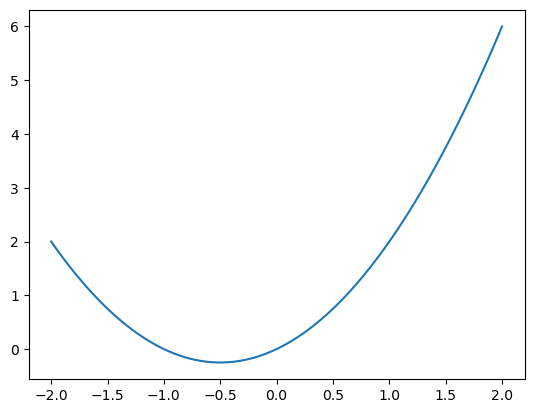

In [9]:
# Input-variable
x0 = -2
y0 = 2
xf = 2 
yd = -3
# Gir oppdelinga av x-intervallet
N = int(input('Gi talet på delintervall: '))

# Funksjonar
def a(x):
    return np.exp(x)
    
def b(x):
    return x
    
def c(x):
    return -2*x**0

def d(x):
    return 2*np.exp(x)-x

# Vektor med x-verdiar
h = (xf-x0)/N
x_vektor = np.arange(x0+h, xf, h)

# Matriser og vektor for funksjonane
A_mat = np.diag(a(x_vektor))
B_mat = np.diag(b(x_vektor))
C_mat = np.diag(c(x_vektor))
C_mat = np.hstack((C_mat, np.zeros((N-1, 1))))   # Utvidar C_matrisa
# reshape() transponerer vektoren til ein søylevektor
D_vektor = d(x_vektor.reshape(-1,1))

# Matriser for dei deriverte
# Brukar midpunktformelen for numerisk derivasjon
D1_mat = np.zeros((N-1, N))
D2_mat = np.zeros((N-1, N))
for ind in range(1, N-2):
    D1_mat[np.ix_([ind], [ind-1, ind+1])] = np.array([-1, 1])/(2*h)
    D2_mat[np.ix_([ind], [ind-1, ind, ind+1])] = np.array([1, -2, 1])/h**2

# Derivert i venstre ende
D1_mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1_mat[N-2, [(N-3), (N-1)]] = np.array([-1, 1])/(2*h)         
# Dobbelt-derivert i venstre ende
D2_mat[0, 0:2] = np.array([-2, 1])/h**2
# Dobbelt-derivert i høgre ende
D2_mat[N-2, (N-3):N] = np.array([1, -2, 1])/h**2     

# Set opp totalmatrisa
tot_mat = np.hstack((np.matmul(A_mat, D2_mat) + \
    np.matmul(B_mat, D1_mat)+C_mat, D_vektor))
# Legg til startkravet på y(x_0)
tot_mat[0, N] = tot_mat[0, N] + \
    y0*(-a(x0+h)/h**2+b(x0+h)/(2*h))
# Legg til startkravet på y'(x_0)
tot_mat = np.vstack((tot_mat, np.zeros((1, N+1))))
tot_mat[N-1, 0:2] = np.array([4, -1])/(2*h)
tot_mat[N-1, N] = yd + 3/(2*h)*y0

# Løyser likningssystemet
aux_s = sympy.Matrix(tot_mat).rref()[0]
aux = np.array(aux_s)
y_vektor = np.transpose(aux[:, N])
# Tar med randpunkta
y_vektor = np.concatenate([[y0], y_vektor])
x_vektor = np.concatenate([[x0], x_vektor, [xf]])

# Plottar løysinga
plt.plot(x_vektor, y_vektor)

Gi talet på delintervall:  100


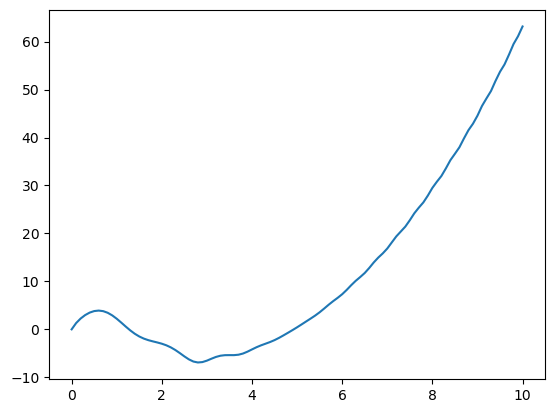

In [14]:
# Input-variable
x0 = 0
y0 = 0
xf = 10
yd = 15
# Gir oppdelinga av x-intervallet
N = int(input('Gi talet på delintervall: '))

# Funksjonar
def a(x):
    return x
    
def b(x):
    return np.sqrt(x)
    
def c(x):
    return 10*np.sin(x**2)

def d(x):
    return x**2

# Vektor med x-verdiar
h = (xf-x0)/N
x_vektor = np.arange(x0+h, xf, h)

# Matriser og vektor for funksjonane
A_mat = np.diag(a(x_vektor))
B_mat = np.diag(b(x_vektor))
C_mat = np.diag(c(x_vektor))
C_mat = np.hstack((C_mat, np.zeros((N-1, 1))))   # Utvidar C_matrisa
# reshape() transponerer vektoren til ein søylevektor
D_vektor = d(x_vektor.reshape(-1,1))

# Matriser for dei deriverte
# Brukar midpunktformelen for numerisk derivasjon
D1_mat = np.zeros((N-1, N))
D2_mat = np.zeros((N-1, N))
for ind in range(1, N-2):
    D1_mat[np.ix_([ind], [ind-1, ind+1])] = np.array([-1, 1])/(2*h)
    D2_mat[np.ix_([ind], [ind-1, ind, ind+1])] = np.array([1, -2, 1])/h**2

# Derivert i venstre ende
D1_mat[0, 1] = 1/(2*h)
# Derivert i høgre ende
D1_mat[N-2, [(N-3), (N-1)]] = np.array([-1, 1])/(2*h)         
# Dobbelt-derivert i venstre ende
D2_mat[0, 0:2] = np.array([-2, 1])/h**2
# Dobbelt-derivert i høgre ende
D2_mat[N-2, (N-3):N] = np.array([1, -2, 1])/h**2     

# Set opp totalmatrisa
tot_mat = np.hstack((np.matmul(A_mat, D2_mat) + \
    np.matmul(B_mat, D1_mat)+C_mat, D_vektor))
# Legg til startkravet på y(x_0)
tot_mat[0, N] = tot_mat[0, N] + \
    y0*(-a(x0+h)/h**2+b(x0+h)/(2*h))
# Legg til startkravet på y'(x_0)
tot_mat = np.vstack((tot_mat, np.zeros((1, N+1))))
tot_mat[N-1, 0:2] = np.array([4, -1])/(2*h)
tot_mat[N-1, N] = yd + 3/(2*h)*y0

# Løyser likningssystemet
aux_s = sympy.Matrix(tot_mat).rref()[0]
aux = np.array(aux_s)
y_vektor = np.transpose(aux[:, N])
# Tar med randpunkta
y_vektor = np.concatenate([[y0], y_vektor])
x_vektor = np.concatenate([[x0], x_vektor, [xf]])

# Plottar løysinga
plt.plot(x_vektor, y_vektor)